In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\COMMAT_classification sc\code\DATASET_ weka_679.csv")

In [3]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [4]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [5]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [6]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


In [8]:
# To select all columns except the last one for X1, and the last column for y1:
X = df.iloc[:, :-1]  # Select all columns except the last one for features (X1)
y = df.iloc[:, -1]   # Select the last column as the target (y1)

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,SSA,PS,PV,Potential,NC,Id/Ig
182,0.477,1.96,0.230,1.0,0.00,1.01
89,0.000,0.00,0.000,0.8,0.00,1.12
185,2.086,2.10,1.100,1.0,0.00,0.00
148,1.578,0.00,1.092,1.2,0.68,0.00
204,0.521,0.00,0.380,1.0,7.30,1.00
...,...,...,...,...,...,...
71,3.110,0.70,1.680,1.0,0.00,0.00
106,0.787,5.81,1.140,1.0,0.00,0.00
270,1.588,0.00,1.010,0.9,5.30,0.84
435,1.417,2.22,1.560,1.0,1.99,1.01


In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
from xgboost import XGBRegressor
# Define XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,       # number of boosting rounds
    learning_rate=0.1,      # step size shrinkage
    max_depth=5,            # depth of trees
    subsample=0.8,          # fraction of data for training each tree
    colsample_bytree=0.8,   # fraction of features for each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.5856528541094499
MAE: 49.27746456010001
RMSE: 66.72720072069679


In [14]:
# XGBoost Regression with GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV



# Define base model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],     # shrinkage
    'max_depth': [3, 5, 7],                 # depth of trees
    'subsample': [0.6, 0.8, 1.0],           # row sampling
    'colsample_bytree': [0.6, 0.8, 1.0]     # feature sampling
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)

# Evaluation
# Evaluation
print("R² Score grid search cv 10:", r2_score(y_test, y_pred))
print("MAE  grid search cv 10:", mean_absolute_error(y_test, y_pred))
print("RMSE  grid search cv 10:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}
R² Score grid search cv 10: 0.5987520002274274
MAE  grid search cv 10: 50.74468331677573
RMSE  grid search cv 10: 65.66397516293267


In [15]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Initialize model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run random search
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
# Evaluation
print("R² Score random search cv 10:", r2_score(y_test, y_pred))
print("MAE  random search cv 10:", mean_absolute_error(y_test, y_pred))
print("RMSE  random search cv 10:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.5, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
R² Score random search cv 10: 0.6104761474504116
MAE  random search cv 10: 49.23397289003645
RMSE  random search cv 10: 64.69753865185793


Feature Importance Scores:
     Feature  Importance
4         NC    0.358175
3  Potential    0.259564
0        SSA    0.113607
2         PV    0.098391
1         PS    0.088565
5      Id/Ig    0.081698


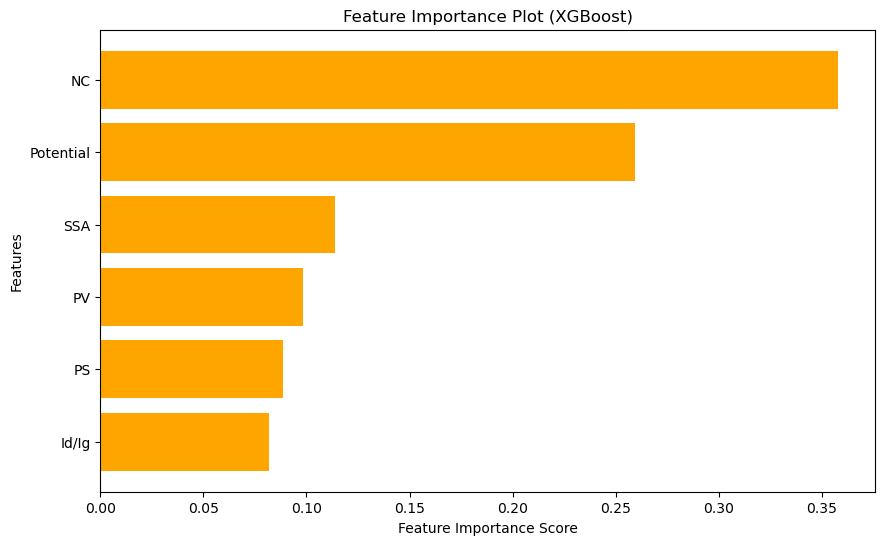

In [17]:

# Initialize and train an XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, max_depth = 10)
xgb_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:")
print(importance_df)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Plot (XGBoost)')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


In [19]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/aa/7c/eead607a358b2466b95b302e4a7eae717eeed53615653fbbd4c1527041b9/shap-0.48.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   - ------------------------------------- 20.5/544.4 kB 682.7 kB/s eta 0:00:01
   ----------------- ---------------------- 235.5/544.4 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.4 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 3.8 MB/s eta 0:00:00


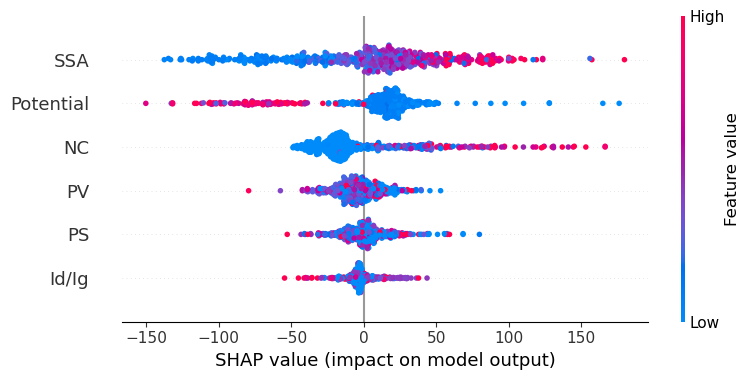

In [20]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X)

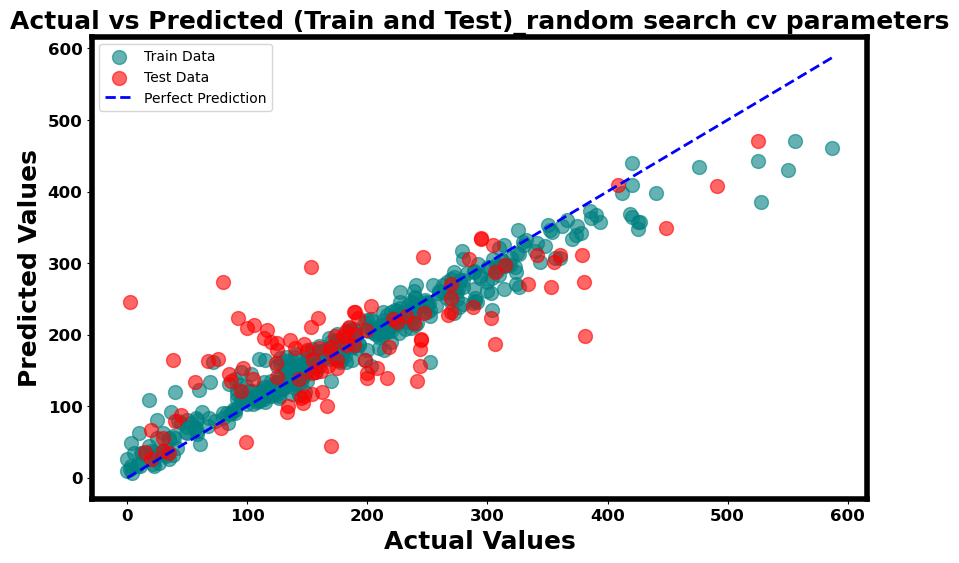

In [22]:
#best_model.predict(X_test)


# Make predictions on both train and test data
y_train_pred = best_model.predict(X_train)
y_test_pred =best_model.predict(X_test)

# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(10, 6))

# Plot for training data
plt.scatter(y_train, y_train_pred, color='teal', s=100, label='Train Data', alpha=0.6)

# Plot for testing data
plt.scatter(y_test, y_test_pred, color='red', s=100, label='Test Data', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test)_random search cv parameters", fontweight="bold", fontsize=18)
plt.legend()

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers



# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

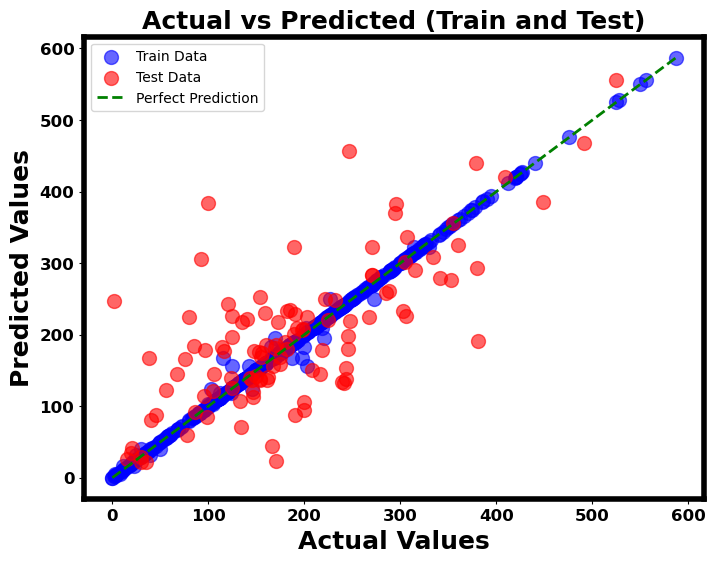

In [23]:
# Make predictions on both train and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(8, 6))

# Plot for training data
plt.scatter(y_train, y_train_pred, color='blue', s=100, label='Train Data', alpha=0.6)

# Plot for testing data
plt.scatter(y_test, y_test_pred, color='red', s=100, label='Test Data', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test)", fontweight="bold", fontsize=18)
plt.legend()

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers



# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

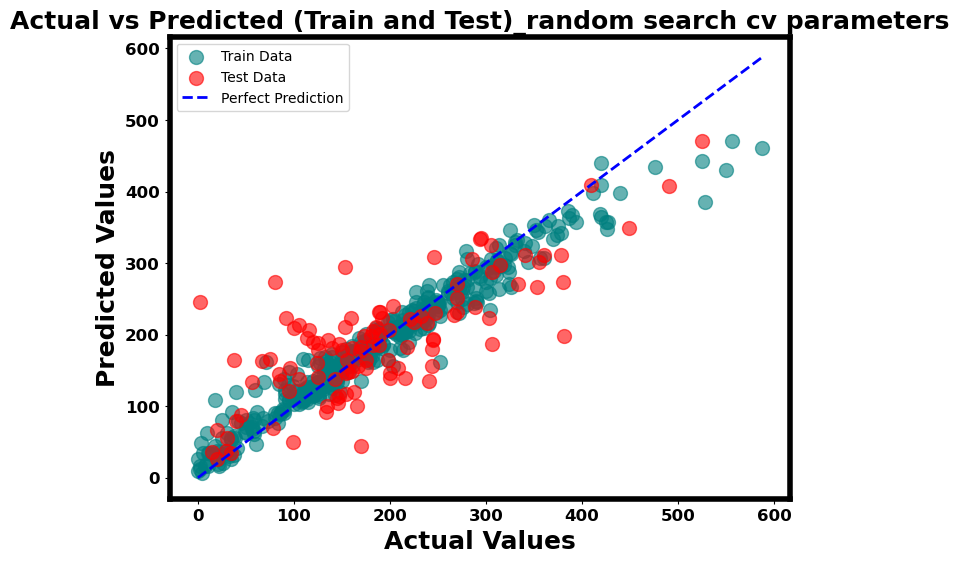

In [26]:
#best_model.predict(X_test)


# Make predictions on both train and test data
y_train_pred_rs = best_model.predict(X_train)
y_test_pred_rs =best_model.predict(X_test)

# Plot actual vs predicted values for training and testing data
plt.figure(figsize=(8, 6))

# Plot for training data
plt.scatter(y_train, y_train_pred_rs, color='teal', s=100, label='Train Data', alpha=0.6)

# Plot for testing data
plt.scatter(y_test, y_test_pred_rs, color='red', s=100, label='Test Data', alpha=0.6)

# Plot a perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linewidth=2, linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel("Actual Values", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Predicted Values", fontweight="bold", fontsize=18)  # Bold y-axis label
plt.title("Actual vs Predicted (Train and Test)_random search cv parameters", fontweight="bold", fontsize=18)
plt.legend()

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers



# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

In [27]:
# Create a DataFrame for better visualization
xg_df = pd.DataFrame({
    'Actual_SC': y_test,
    'Predicted_SC': y_test_pred_rs
})
print(xg_df)

     Actual_SC  Predicted_SC
158      378.5    310.954620
451      360.0    310.804199
55       156.0    147.516174
247      145.0    110.730194
70       295.0    335.075836
..         ...           ...
11       333.9    270.597351
374      246.0    308.438110
22       225.0    217.585281
381      161.0    149.132980
373      208.0    153.996338

[112 rows x 2 columns]


In [28]:
# Save to Excel
xg_df.to_excel('xg_df.xlsx', index=False)

In [29]:
# Create a DataFrame for better visualization
xg_df_train = pd.DataFrame({
    'Actual_SC': y_train,
    'Predicted_SC': y_train_pred_rs
})
print(xg_df_train)
xg_df_train.to_excel('xg_df_train.xlsx', index=False)

     Actual_SC  Predicted_SC
182       80.0     82.943817
89       228.0    226.078430
185      250.0    239.349808
148      310.0    282.664001
204      273.0    259.758911
..         ...           ...
71       280.0    305.114349
106      177.0    175.876389
270      240.4    269.921204
435      190.0    202.474548
102      193.0    186.102219

[446 rows x 2 columns]
